In [3]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp 

from sklearn.preprocessing import scale, MinMaxScaler, Normalizer, StandardScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import roc_auc_score,roc_curve, classification_report
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

from sklearn.cluster import KMeans
import timeit
from warnings import filterwarnings
filterwarnings('ignore')

## **Data Importing**

In [13]:
data = pd.read_excel("/content/drive/My Drive/Colab Notebooks/Veri-Bilimi-Bootcamp/Odevler/HW_Data_Set.xlsx")
data.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_40,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,...,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,12.060000,9.1100,2,15,13,1,56,0.002690,-0.002670,0.000010,66.666667,93.692449,146.592674,150.505806,154.486989,158.009516,142.421114,142.023350,196.592517,184.819232,31.939605,3,30.752568,-5,-22,-22,-21,-23,-36,-40,...,97.980028,1.179209,-0.756946,98.905563,1.190348,99.156641,-0.000062,12.056738,-0.157039,20.967742,-0.000091,1.197238,-0.319064,0.0,0.0,0.0,0.0,0.0,0.0,-3.731343,-32.587430,-26.386973,-0.003323,0.045130,-0.044678,-44,-23,-27,0.002371,2.0,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,11.326667,9.2225,0,11,11,1,63,0.002729,-0.003111,-0.000191,66.666667,76.694104,140.227205,156.903278,161.604303,169.720843,152.634492,149.634976,201.738617,191.985663,38.478501,3,36.812130,-6,-18,-24,-24,-25,-38,-43,...,97.932319,1.179223,-0.756569,98.859627,1.190389,99.111914,-0.000062,11.971831,-0.156961,20.800000,-0.000091,1.197328,-0.318905,0.0,0.0,0.0,0.0,0.0,0.0,-1.369863,-38.115965,-26.085949,-0.000476,0.035314,-0.034961,-48,-16,-31,0.003074,0.8,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,10.973333,9.3125,5,15,9,-1,65,0.002780,-0.003530,-0.000375,66.666667,83.909974,117.755945,154.452274,164.015689,175.947530,160.181486,155.527932,205.238017,197.993551,28.917197,3,39.648290,-4,-11,-21,-22,-24,-36,-42,...,97.910664,1.179236,-0.756393,98.839991,1.190429,99.093554,-0.000062,11.888112,-0.156925,20.634921,-0.000091,1.197419,-0.318831,0.0,0.0,0.0,0.0,0.0,0.0,-4.278922,-40.428126,-23.250410,-0.000309,0.005860,-0.005802,-48,-10,-30,0.003561,2.7,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,10.426667,9.4150,11,18,8,0,68,0.002679,-0.003961,-0.000641,66.666667,98.596644,100.147384,139.695620,158.006863,171.688382,161.192133,156.413230,203.641362,200.370912,31.449631,3,40.902782,-5,-10,-21,-23,-26,-37,-44,...,97.870334,1.179249,-0.756073,98.801500,1.190469,99.056290,-0.000062,11.805556,-0.156858,20.472441,-0.000091,1.197509,-0.318696,0.0,0.0,0.0,0.0,0.0,0.0,-1.355422,-45.019355,-19.499975,0.001137,-0.018252,0.018070,-51,-10,-30,0.004366,0.9,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,11.406667,9.8925,13,23,10,10,91,0.003986,-0.004624,-0.000319,66.666667,149.283572,124.092409,168.275524,196.846256,208.017747,193.924291,184.995906,227.848369,223.561880,50.406504,2,48.462194,-18,-26,-37,-40,-43,-53,-61,...,97.705214,1.179263,-0.754789,98.637028,1.190509,98.892717,-0.000062,11.724138,-0.156592,20.312500,-0.000091,1.197600,-0.318155,0.0,0.0,0.0,0.0,0.0,0.0,-0.116144,-54.849177,-25.348270,0.001552,-0.007183,0.007111,-70,-24,-45,0.004198,0.1,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


# **1. Data Statistics**

In [14]:
data.shape

(6167, 136)

In [15]:
describe(data)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_40,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,...,ind_309,ind_310,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target
count,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,...,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000
mean,-0.803146,-0.803470,48.388890,48.289282,0.099609,49.488867,-18.497518,11.771485,11.773550,11.773392,11.772164,11.756105,-0.268040,-0.723528,-0.444300,-25.970975,24.945192,0.002215,-0.002264,-0.000024,1.048592,0.913289,1.596028,1.102192,-0.276875,-3.087097,-5.202559,-6.191402,-8.376898,-12.298849,-0.142528,3.493271,-1.071197,0.041349,0.099724,0.198962,0.296579,0.342792,0.377493,0.460353,...,-0.000032,-0.422692,95.137008,1.152460,-0.674508,80.624985,0.980187,68.391460,-0.000074,24.704677,-0.167167,15.757278,-0.000022,0.127180,-0.014782,-0.000006,-0.006399,1.210483,-0.000001,0.259444,0.145690,-49.281281,0.508078,-0.011978,-0.000038,0.000004,-0.000004,0.985568,0.099238,0.239987,0.000224,28.529204,-8.554792,-28.166694,0.490297,0.498188,0.490174,-0.057102,-2.906358,-3.315072
std,23.624403,23.624144,36.388526,36.478009,60.414625,12.198722,68.281120,6.803997,5.786089,4.970499,4.488712,2.707619,8.923976,19.028597,11.028702,27.775290,24.669109,0.001415,0.001340,0.000615,66.642196,94.129876,107.442006,113.192879,117.337570,122.636373,123.710650,121.221664,118.771328,118.717178,32.933895,0.765103,20.824311,6.258027,9.216991,12.078004,14.736603,17.107677,21.239270,24.943979,...,0.000068,0.439721,18.305353,0.222516,0.778421,38.593195,0.469599,46.199740,0.000133,35.950863,0.471591,31.778804,0.000076,0.373173,0.088771,0.000049,0.052501,9.494788,0.000024,5.087360,3.279205,29.026477,21.591722,5.931067,0.002144,0.015594,0.015438,29.168401,9.843004,15.310151,0.005660,26.316896,16.100087,23.271524,0.425376,0.228547,0.150483,14.834497,34.559778,36.841541
min,-131.000000,-131.000000,0.000000,0.000000,-100.000000,12.134540,-625.093855,1.050000,1.660000,2.580000,3.333333,5.177500,-58.000000,-105.000000,-58.000000,-282.000000,-39.000000,0.000028,-0.012656,-0.004341,-133.333333,-166.666667,-331.567467,-392.609182,-407.738948,-539.934734,-489.309247,-529.869160,-483.426495,-401.794355,-88.900747,1.000000,-59.491496,-45.000000,-66.000000,-73.000000,-79.000000,-73.000000,-76.000000,-85.000000,...,-0.000742,-1.924803,0.000000,0.000000,-3.017206,0.000000,0.000000,0.000000,-0.001550,0.000000,-2.828137,0.000000,-0.000609,0.000000,-1.270209,-0.000639,-0.637499,0.000000,-0.000780,0.000000,0.000000,-100.000000,-81.903204,-75.406870,-0.018918,-0.106756,-0.090735,-98.000000,-81.000000,-83.000000,-0.023790,0.000000,-103.800000,-188.000000,0.000000,0.000000,0.083530,-15.780588,-37.142889,-38.573858
25%,-14.000000,-1

### **1.2. Categoric and Numeric variables Analysis**

In [16]:
num, cat = numeric_categoric_variable(data)

Numeric Column  :
 ['ind_5', 'ind_6', 'ind_8', 'ind_9', 'ind_10', 'ind_12', 'ind_13', 'ind_14', 'ind_15', 'ind_16', 'ind_17', 'ind_18', 'ind_19', 'ind_20', 'ind_21', 'ind_22', 'ind_23', 'ind_25', 'ind_26', 'ind_27', 'ind_28', 'ind_29', 'ind_30', 'ind_31', 'ind_32', 'ind_33', 'ind_34', 'ind_35', 'ind_36', 'ind_37', 'ind_39', 'ind_40', 'ind_41', 'ind_42', 'ind_43', 'ind_44', 'ind_45', 'ind_46', 'ind_47', 'ind_48', 'ind_49', 'ind_50', 'ind_51', 'ind_52', 'ind_53', 'ind_56', 'ind_58', 'ind_61', 'ind_62', 'ind_65', 'ind_67', 'ind_70', 'ind_71', 'ind_74', 'ind_77', 'ind_82', 'ind_83', 'ind_88', 'ind_92', 'ind_102', 'ind_116', 'ind_118', 'ind_122', 'ind_124', 'ind_128', 'ind_130', 'ind_132', 'ind_134', 'ind_136', 'ind_139', 'ind_142', 'ind_145', 'ind_147', 'ind_150', 'ind_153', 'ind_156', 'ind_164', 'ind_168', 'ind_172', 'ind_176', 'ind_179', 'ind_181', 'ind_188', 'ind_194', 'ind_212', 'ind_217', 'ind_225', 'ind_228', 'ind_234', 'ind_237', 'ind_239', 'ind_241', 'ind_243', 'ind_309', 'ind_310'

In [17]:
sortDifferentCategory(data)

[['ind_109', 2],
 ['ind_40', 6],
 ['ind_82', 6],
 ['ind_217', 6],
 ['ind_28', 7],
 ['ind_349', 7],
 ['ind_8', 15],
 ['ind_9', 15],
 ['ind_351', 17],
 ['ind_352', 17],
 ['ind_70', 18],
 ['ind_67', 22],
 ['ind_344', 22],
 ['ind_83', 25],
 ['ind_10', 29],
 ['ind_77', 37],
 ['ind_61', 38],
 ['ind_74', 42],
 ['ind_71', 46],
 ['ind_58', 50],
 ['ind_122', 52],
 ['ind_65', 55],
 ['ind_62', 64],
 ['ind_347', 69],
 ['ind_42', 71],
 ['ind_334', 71],
 ['ind_19', 83],
 ['ind_21', 84],
 ['ind_52', 90],
 ['ind_136', 91],
 ['ind_134', 93],
 ['ind_43', 94],
 ['ind_56', 102],
 ['ind_407', 103],
 ['ind_345', 108],
 ['ind_44', 109],
 ['ind_45', 126],
 ['ind_124', 128],
 ['ind_53', 131],
 ['ind_116', 131],
 ['ind_46', 135],
 ['ind_418', 139],
 ['ind_20', 141],
 ['ind_410', 143],
 ['ind_234', 157],
 ['ind_47', 159],
 ['ind_5', 162],
 ['ind_6', 162],
 ['ind_48', 175],
 ['ind_23', 177],
 ['ind_49', 189],
 ['ind_22', 192],
 ['ind_406', 200],
 ['ind_128', 201],
 ['ind_324', 241],
 ['ind_309', 249],
 ['ind_50', 

### **1.3. NULL Value Checking**

In [18]:
nulldata_check(data).sort_values(by="count",ascending=False).head(7)

,count,percentage
90_target,0,0.0
ind_416,0,0.0
ind_404,0,0.0
ind_406,0,0.0
ind_407,0,0.0
ind_410,0,0.0
ind_412,0,0.0


# Data Preprocessing

### **2.1. Noise data cleaning**

In [19]:
#data["ind_420"] = data["ind_420"].replace("?", np.nan)
#data["ind_422"] = data["ind_422"].replace("?", np.nan)
data = data.drop(["ind_420", "ind_422"],axis=1)

### **2.2. Dummy Transformation**

In [20]:
data_dummy = dummy_df(data, ["ind_109"])
data_dummy2 = dummy_df(data, ["ind_109","ind_40"])

num, cat = numeric_categoric_variable(data_dummy)
data_dummy.head()

Numeric Column  :
 ['ind_5', 'ind_6', 'ind_8', 'ind_9', 'ind_10', 'ind_12', 'ind_13', 'ind_14', 'ind_15', 'ind_16', 'ind_17', 'ind_18', 'ind_19', 'ind_20', 'ind_21', 'ind_22', 'ind_23', 'ind_25', 'ind_26', 'ind_27', 'ind_28', 'ind_29', 'ind_30', 'ind_31', 'ind_32', 'ind_33', 'ind_34', 'ind_35', 'ind_36', 'ind_37', 'ind_39', 'ind_40', 'ind_41', 'ind_42', 'ind_43', 'ind_44', 'ind_45', 'ind_46', 'ind_47', 'ind_48', 'ind_49', 'ind_50', 'ind_51', 'ind_52', 'ind_53', 'ind_56', 'ind_58', 'ind_61', 'ind_62', 'ind_65', 'ind_67', 'ind_70', 'ind_71', 'ind_74', 'ind_77', 'ind_82', 'ind_83', 'ind_88', 'ind_92', 'ind_102', 'ind_116', 'ind_118', 'ind_122', 'ind_124', 'ind_128', 'ind_130', 'ind_132', 'ind_134', 'ind_136', 'ind_139', 'ind_142', 'ind_145', 'ind_147', 'ind_150', 'ind_153', 'ind_156', 'ind_164', 'ind_168', 'ind_172', 'ind_176', 'ind_179', 'ind_181', 'ind_188', 'ind_194', 'ind_212', 'ind_217', 'ind_225', 'ind_228', 'ind_234', 'ind_237', 'ind_239', 'ind_241', 'ind_243', 'ind_309', 'ind_310'

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_40,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,...,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target,ind_109_GREEN,ind_109_RED
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,12.060000,9.1100,2,15,13,1,56,0.002690,-0.002670,0.000010,66.666667,93.692449,146.592674,150.505806,154.486989,158.009516,142.421114,142.023350,196.592517,184.819232,31.939605,3,30.752568,-5,-22,-22,-21,-23,-36,-40,...,97.980028,1.179209,-0.756946,98.905563,1.190348,99.156641,-0.000062,12.056738,-0.157039,20.967742,-0.000091,1.197238,-0.319064,0.0,0.0,0.0,0.0,0.0,0.0,-3.731343,-32.587430,-26.386973,-0.003323,0.045130,-0.044678,-44,-23,-27,0.002371,2.0,-49.6,-54,1.0,0.498547,0.701906,15.135802,35.625252,36.997753,1,0
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,11.326667,9.2225,0,11,11,1,63,0.002729,-0.003111,-0.000191,66.666667,76.694104,140.227205,156.903278,161.604303,169.720843,152.634492,149.634976,201.738617,191.985663,38.478501,3,36.812130,-6,-18,-24,-24,-25,-38,-43,...,97.932319,1.179223,-0.756569,98.859627,1.190389,99.111914,-0.000062,11.971831,-0.156961,20.800000,-0.000091,1.197328,-0.318905,0.0,0.0,0.0,0.0,0.0,0.0,-1.369863,-38.115965,-26.085949,-0.000476,0.035314,-0.034961,-48,-16,-31,0.003074,0.8,-55.6,-60,1.0,0.537088,0.690833,15.143348,35.643013,37.016198,1,0
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,10.973333,9.3125,5,15,9,-1,65,0.002780,-0.003530,-0.000375,66.666667,83.909974,117.755945,154.452274,164.015689,175.947530,160.181486,155.527932,205.238017,197.993551,28.917197,3,39.648290,-4,-11,-21,-22,-24,-36,-42,...,97.910664,1.179236,-0.756393,98.839991,1.190429,99.093554,-0.000062,11.888112,-0.156925,20.634921,-0.000091,1.197419,-0.318831,0.0,0.0,0.0,0.0,0.0,0.0,-4.278922,-40.428126,-23.250410,-0.000309,0.005860,-0.005802,-48,-10,-30,0.003561,2.7,-58.4,-60,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805,1,0
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,10.426667,9.4150,11,18,8,0,68,0.002679,-0.003961,-0.000641,66.666667,98.596644,100.147384,139.695620,158.006863,171.688382,161.192133,156.413230,203.641362,200.370912,31.449631,3,40.902782,-5,-10,-21,-23,-26,-37,-44,...,97.870334,1.179249,-0.756073,98.801500,1.190469,99.056290,-0.000062,11.805556,-0.156858,20.472441,-0.000091,1.197509,-0.318696,0.0,0.0,0.0,0.0,0.0,0.0,-1.355422,-45.019355,-19.499975,0.001137,-0.018252,0.018070,-51,-10,-30,0.004366,0.9,-61.8,-65,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483,1,0
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,11.406667,9.8925,13,23,10,10,91,0.003986,-0.004624,-0.000319,66.666667,149.283572,124.092409,168.275524,196.846256,208.017747,193.924291,184.995906,227.848369,223.561880,50.406504,2,48.462194,-18,-26,-37,-40,-43,-53,-61,...,97.705214,1.179263,-0.754789,98.637028,1.190509,98.892717,-0.000062,11.724138,-0.156592,20.312500,-0.000091,1.197600,-0.318155,0.0,0.0,0.0,0.0,0.0,0.0,-0.116144,-54.849177,-25.348270,0.001552,-0.007183,0.007111,-70,-24,-45,0.004198,0.1,-79.8,-86,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503,1,0


### **2.3. Target variables are dropped**

In [21]:
data_dummy = data_dummy.drop(["20_target","50_target","90_target"], axis=1)

# **3. PCA based Feature Selection**

In [31]:
data_pca = featureselection_pca(scale(data_dummy), 0.9)
data_pca.head()

pca sonrası değişken sayısı:  27


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,-11.822543,-3.268841,6.502793,-1.394212,0.665758,-0.908406,-1.772313,-0.752222,-1.523123,-2.455193,-1.360745,0.710823,0.616337,-0.504663,-1.797861,1.344701,1.805038,1.060794,3.049259,3.753820,-2.460912,-1.123208,-0.942609,1.431210,-0.205931,0.588325,0.251256
1,-12.884857,-2.833142,5.023846,-0.594320,1.613146,-1.373742,-1.743751,-0.854689,-0.841788,-2.731657,-1.046326,0.312307,1.199422,-0.474190,-1.343763,0.945602,1.759956,1.318130,3.216427,3.705629,-2.555429,-1.185169,-1.110279,1.504580,-0.121952,0.440620,-0.215571
2,-12.949664,-1.238067,3.565824,0.309928,1.971284,-1.345161,-0.958778,-1.099323,0.018290,-2.482215,-0.973059,0.646482,1.573320,-1.156262,-0.422716,0.301225,2.103869,1.051653,2.568360,4.054702,-1.876180,-0.936944,-1.457186,1.854109,-0.294099,0.383503,-0.507689
3,-13.350084,-0.231834,2.624446,0.497977,1.572311,-0.245229,1.285996,-1.477630,1.030668,-2.091441,-0.769671,0.811085,1.963114,-1.711742,0.288766,-0.252087,2.395776,0.915179,1.934965,4.379649,-1.398998,-0.853110,-1.837458,2.081547,-0.438559,0.413122,-0.649488
4,-17.193741,-3.264592,4.634170,0.257018,-0.164442,1.173461,2.506775,-1.415957,0.870062,-3.712507,-1.445874,0.927462,2.102303,-1.140210,-0.234588,1.800849,1.816341,0.411976,2.112795,5.206533,-0.225840,-0.091029,-2.383541,1.983209,-0.902630,-0.675597,-1.392129


# **4. Modelling**

In [32]:
kmeans = KMeans(n_clusters=4)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [33]:
k_fit = kmeans.fit(data_pca)
k_fit.n_clusters

4

In [41]:
kumeler = k_fit.labels_
k_fit.cluster_centers_

array([[ 1.47137833e+00, -3.12867894e+00, -7.38897097e-01,
        -3.53939104e-01,  5.27937652e-01,  9.79541102e-02,
         2.85329417e-01, -3.23441573e-02, -1.12608767e-01,
        -1.59824818e-01,  1.42848741e-01, -8.52493327e-02,
        -1.11925686e-01, -2.83064914e-02, -8.42375400e-02,
        -4.59705358e-01,  5.84074951e-02,  2.41980838e-02,
        -2.22172450e-02, -6.41381110e-02,  7.63188079e-02,
        -1.31093215e-01,  6.26665977e-02,  5.11293070e-02,
        -1.23043479e-01,  2.59764216e-01, -1.22542653e-01],
       [ 9.03288266e+00,  1.21646286e+00,  7.42586721e-01,
         6.33020564e-01, -3.26272306e-01,  5.47514263e-02,
        -4.82270868e-02,  8.57899116e-02,  4.61424869e-02,
        -2.33659895e-01, -2.20342284e-01,  1.28013472e-01,
        -5.47550607e-02,  9.88802418e-02, -5.22979898e-02,
         1.30225117e-01, -3.04882612e-02,  1.46902700e-02,
         7.57193553e-02,  8.22092128e-02,  4.13524831e-02,
         3.43664502e-02, -7.78561464e-03,  7.27403029e-

In [55]:
k_fit.labels_

array([3, 3, 3, ..., 3, 3, 3], dtype=int32)

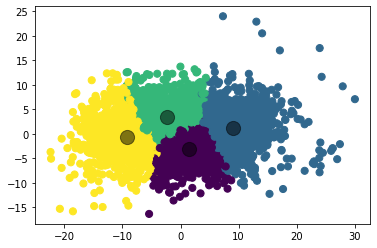

In [42]:
plt.scatter(data_pca.iloc[:,0], data_pca.iloc[:,1], c=kumeler, s=50, cmap="viridis")
merkezler = k_fit.cluster_centers_
plt.scatter(merkezler[:,0], merkezler[:,1], c="black", s=200, alpha=0.5)
plt.show()

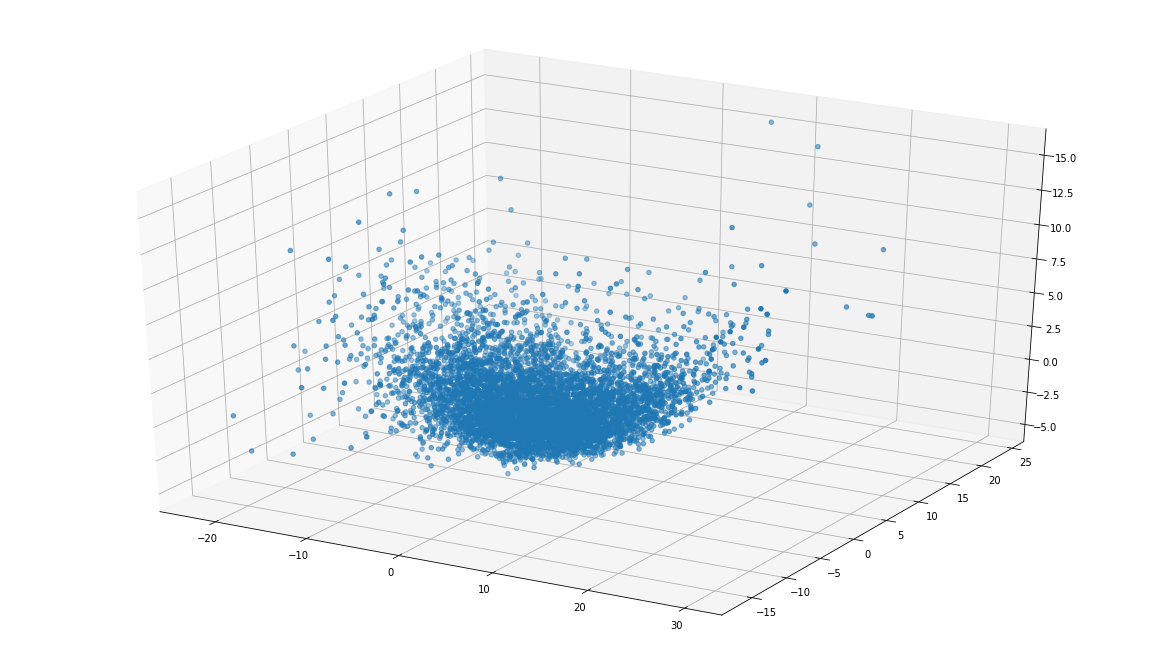

In [43]:
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data_pca.iloc[:, 0], data_pca.iloc[:, 1], data_pca.iloc[:, 3]);

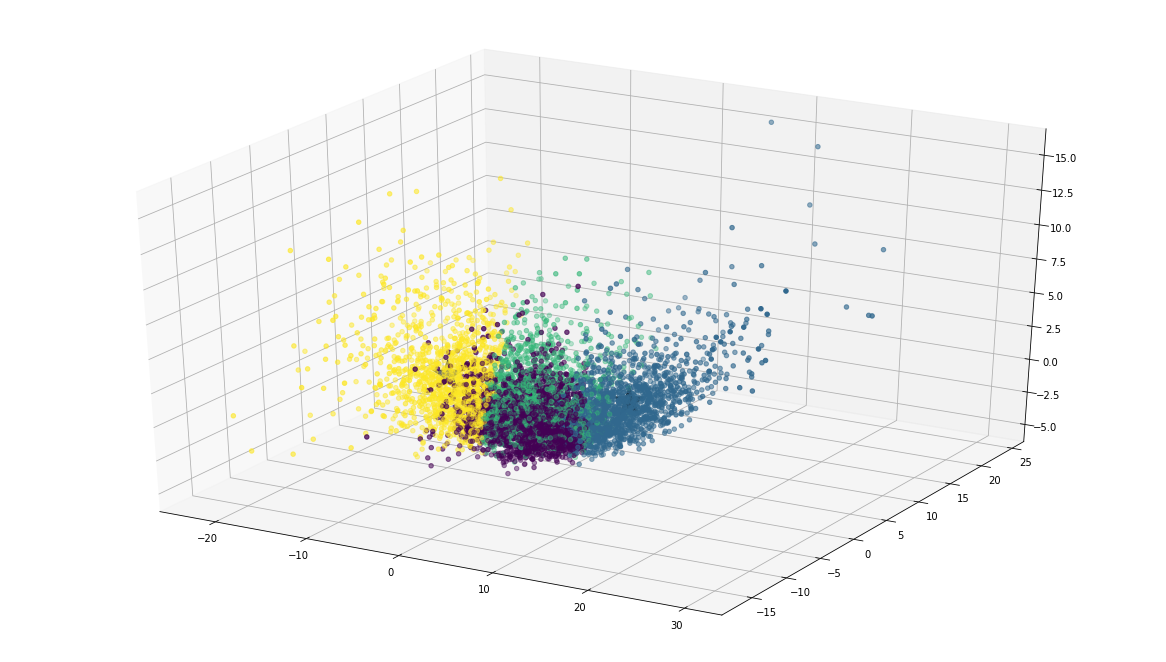

In [45]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data_pca.iloc[:, 0], data_pca.iloc[:, 1], data_pca.iloc[:, 3], c=kumeler)
ax.scatter(merkezler[:, 0], merkezler[:, 1], merkezler[:, 3], 
           marker='*', 
           c='#080808', 
           s=1000);

In [46]:
data_kmeans = data_pca
data_kmeans["clusters"] = kumeler
data_kmeans.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,clusters
0,-11.822543,-3.268841,6.502793,-1.394212,0.665758,-0.908406,-1.772313,-0.752222,-1.523123,-2.455193,-1.360745,0.710823,0.616337,-0.504663,-1.797861,1.344701,1.805038,1.060794,3.049259,3.753820,-2.460912,-1.123208,-0.942609,1.431210,-0.205931,0.588325,0.251256,3
1,-12.884857,-2.833142,5.023846,-0.594320,1.613146,-1.373742,-1.743751,-0.854689,-0.841788,-2.731657,-1.046326,0.312307,1.199422,-0.474190,-1.343763,0.945602,1.759956,1.318130,3.216427,3.705629,-2.555429,-1.185169,-1.110279,1.504580,-0.121952,0.440620,-0.215571,3
2,-12.949664,-1.238067,3.565824,0.309928,1.971284,-1.345161,-0.958778,-1.099323,0.018290,-2.482215,-0.973059,0.646482,1.573320,-1.156262,-0.422716,0.301225,2.103869,1.051653,2.568360,4.054702,-1.876180,-0.936944,-1.457186,1.854109,-0.294099,0.383503,-0.507689,3
3,-13.350084,-0.231834,2.624446,0.497977,1.572311,-0.245229,1.285996,-1.477630,1.030668,-2.091441,-0.769671,0.811085,1.963114,-1.711742,0.288766,-0.252087,2.395776,0.915179,1.934965,4.379649,-1.398998,-0.853110,-1.837458,2.081547,-0.438559,0.413122,-0.649488,3
4,-17.193741,-3.264592,4.634170,0.257018,-0.164442,1.173461,2.506775,-1.415957,0.870062,-3.712507,-1.445874,0.927462,2.102303,-1.140210,-0.234588,1.800849,1.816341,0.411976,2.112795,5.206533,-0.225840,-0.091029,-2.383541,1.983209,-0.902630,-0.675597,-1.392129,3


In [48]:
data_kmeans.groupby("clusters").count()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938
1,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413
2,1495,1495,1495,1495,1495,1495,1495,1495,1495,1495,1495,1495,1495,1495,1495,1495,1495,1495,1495,1495,1495,1495,1495,1495,1495,1495,1495
3,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321


### 4.1. **Optimum Cluster using KElbowVisualizer**

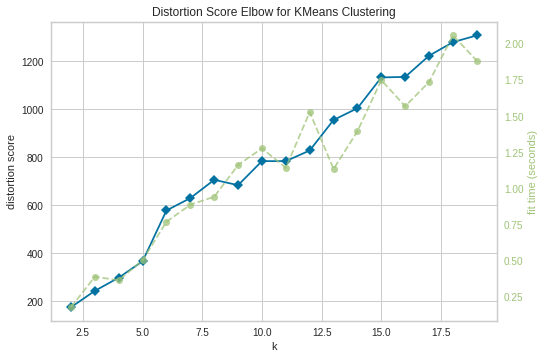

In [50]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,20))
visualizer.fit(data_pca)
visualizer.poof()

# **5. Model Tuning**

In [63]:
kmeans_params = {"n_clusters": np.arange(2,20),
              "init": ["k-means++", "random"],
              "max_iter": [300,500]}

labels, centroids, kmeans_model, best_params = KMeansTuning(data_pca, kmeans_params)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  7.3min finished


In [65]:
kmeans_model.fit(data_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=19, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [66]:
kmeans_model.labels_

array([ 1,  1,  1, ..., 12, 12, 12], dtype=int32)

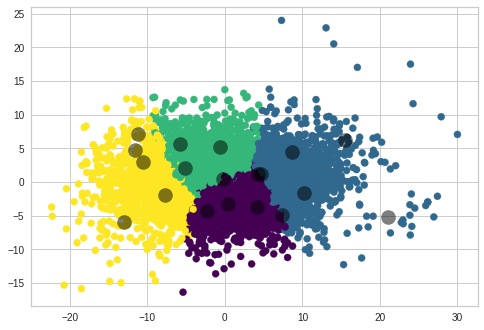

In [68]:
plt.scatter(data_pca.iloc[:,0], data_pca.iloc[:,1], c=kumeler, s=50, cmap="viridis")
merkezler = kmeans_model.cluster_centers_
plt.scatter(merkezler[:,0], merkezler[:,1], c="black", s=200, alpha=0.5)
plt.show()

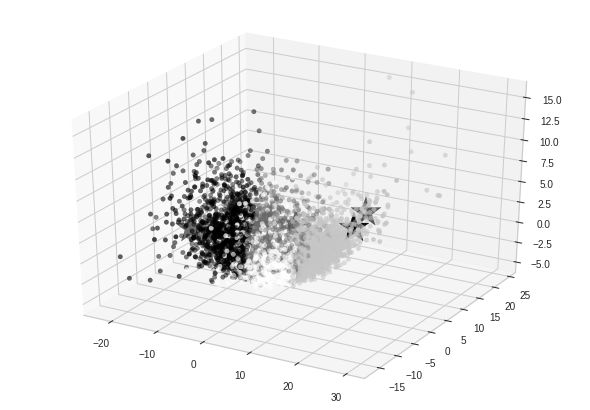

In [69]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data_pca.iloc[:, 0], data_pca.iloc[:, 1], data_pca.iloc[:, 3], c=kumeler)
ax.scatter(merkezler[:, 0], merkezler[:, 1], merkezler[:, 3], 
           marker='*', 
           c='#080808', 
           s=1000);